# Classical Statistical Inference: Basic concepts

## Table of Content

- II. What is statistical inference ? 
    * II.1 [Point estimate](#II.1-Point-estimate:)
        - [II.1.1 Summary of useful statistics](#II.1.1-Summary-of-useful-statistics)
        - [II.1.2 Distributions of estimators](#II.1.2-Distributions-of-estimators)
    * II.2 Confidence interval: See [Frequentist_inference_02.ipynb](Frequentist_inference_02.ipynb)
    * II.3 Hypothesis testing: See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb) 

    * II.4 Bootstrap and Jacknife: See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb) 
    
    * II.5 Wrap up: Various approaches of hypothesis testing: See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb)
    
- X. [References and supplementary material](#X)

## II. What is statistical inference ?  <a class="anchor" id="II"></a>

Statistical inference is the process that consists in deriving information about a phenomenon/something based on a data set. More specifically, it the process of using data to infer the distribution that "generated" the data. This is what is called "learning" in the context of computer science. 

Statistical inference implies first to define a **statistical model** (or several) that describe(s) the data. This can be distribution function(s) but also a regression law(s), that is (are) parametrized by a finite number of parameters, generally denoted $\theta$ in most of statistical books. Then, the remaining of the "game" is to confront this model to the data to see if it is well suited, and whether we can infer the values of its parameters.  

There is basically three types of inference one draws from data:
- ** Point estimation **: What is the best estimate for a model parameter $\theta$ based on the available data ? 
- ** Confidence estimation **: How confident should we be about our point estimate ? 
- ** Hypothesis testing **: Are the data at hand consistent with a given hypothesis or model ? 

This is common to any statistical paradigm (i.e. Frequentist and Bayesian). We will see first how statistical inference is performed under the "classical" (aka frequentist) paradigm. In a future lecture, we will see the Bayesian approach and try to understand the "philosphical" differences between those. 

### II. 1 Point estimate:

Point estimates are estimates of *population parameters based on sample data*. For example, we may want to estimate the mean color of elliptical galaxies at a given redshift based on a subsample drawn from a survey. We would derive a mean value that may differ from the true population mean for several reasons: statistical fluctuation due to the limited size of the sample, bias in selection, ...  

For frequentists, thist consists in deriving a single **best** guess for a quantity of interest, that can be a parameter in a parametric model, a regression function, a CDF $H(x)$, a pdf $h(x)$ or predictions for a future value $Y$ of a random variable. 

By convention, the point estimate of a parameter $\theta$ is denoted $\hat{\theta}$. Remember that here, there is one *single fixed value* of $\theta$, while the estimator $\hat{\theta}$ depends on the data, and is therefore a random variable.   

A point estimator $\hat{\theta}$ of a parameter $\theta$ is a function of the random variables $X_1$, $X_2$, ... such that:    
$$
\hat{\theta} = g(X_1, X_2, X_3, ... X_n)
$$

As for any estimator you have encountered in descriptive statistics, this estimator can be biased (i.e. its value could differ from its true value by some amount), and be characterized by some variance (remember that $\hat{\theta}$ is a random variable). 

You could think that the "(un)-biased" character of an estimator is critical property of the estimator we would look at, but in fact this is not always critical, and many of the estimators we will consider are biased. More important is that a point estimator $\hat{\theta}$ **asymptotically converges** to the true parameter value (with asymptotically null variance). Mathetematicians then states that an estimator is **consistent**.  

The distribution of $\hat{\theta}$ is called the **sampling distribution**.  

An important theorem to keep in mind when studying point estimates is the **central limit theorem** which states that: when independent random variables are added, their sum tends toward a normal distribution even if the original variables themselves are not normally distributed. For that reason, if you want to measure the arithmetic mean $\mu$ of a population, you can be sure that the *sampling distribution* of $\hat{\mu}$ will tend towards a normal distribution.    

**Note:**   
For those who are familiar with bayesian statistics, the fact that $\theta$ (i.e. the population parameter, *not* its sample estimate $\hat{\theta}$) is not considered as a random variable, is one of the key difference between frequentist and bayesian inference. 

Parameters of the gaussian fit vs population mean: hat(mu)=-0.26, mu_pop=-0.26


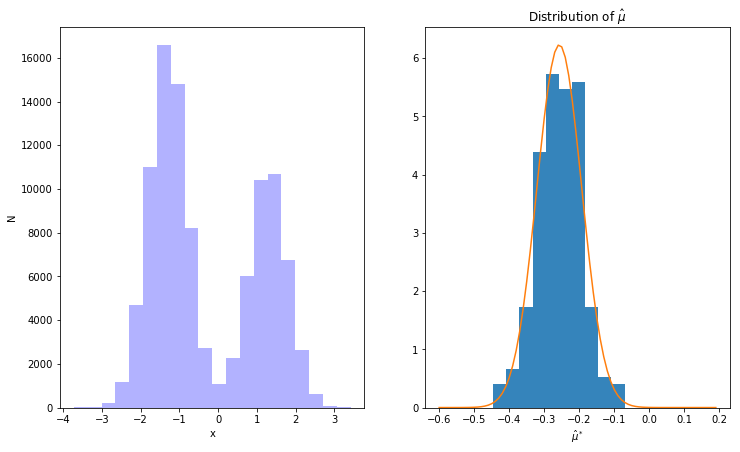

In [2]:
# Illustration of the central limit theorem

import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Nmeans = 200
np.random.seed(0)

f, ax = plt.subplots(ncols=2, figsize=(12, 7))

fracs = (0.6, 0.4)   # the relative contribution of each gaussian
dist1, dist2 = scipy.stats.norm(-1.3, 0.5), scipy.stats.norm(1.3, 0.5)
x_sample = np.concatenate( (dist1.rvs(int(fracs[0]*100000)), dist2.rvs(int(fracs[1]*100000))) ) # Large sample drawn from a bimodal population

# Let's calculate the mean 
point_estimates = []         # Make empty list to hold point estimates

for x in range(Nmeans):         # Generate 200 samples
    # I pick 500 elements randomly from the original large sample (that approximate the population distrib)
    sample = np.random.choice(a= x_sample, size=500)        
    point_estimates.append( sample.mean() )   # I estimate the mean and put the result in the list "point_estimate"

# let's fit a Gaussian on the pdf of the means
gaussfit_mu, gaussfit_std = scipy.stats.norm.fit(point_estimates)
xval = np.arange(-0.6,0.2, 0.01)

ax[0].hist(x_sample, bins=20, color='blue', alpha=0.3)
ax[1].hist(point_estimates, normed=True, alpha=0.9)
ax[1].plot(xval, scipy.stats.norm.pdf(xval, gaussfit_mu, gaussfit_std))
ax[1].set_title(r'Distribution of $\hat{\mu}$')
ax[0].set_ylabel('N')
ax[0].set_xlabel('x')
ax[1].set_xlabel(r'$\hat{\mu}^*$')

print 'Parameters of the gaussian fit vs population mean: hat(mu)=%.2f, mu_pop=%.2f' %(gaussfit_mu, np.mean(x_sample))

### II.1.1 Summary of useful statistics

| | Sample Statistics | Population Statistics | 
|:-------|:------|:----------------| 
|size   | n     | N | 
| mean  | $\hat{\mu} = \bar{x} = \frac{\sum_i x_i}{n}$ | $\mu = \bar{X} = \frac{\sum_i X_i}{N}$ |  
| Variance | $s^2 = \frac{\sum_i(x_i-\bar{x})^2}{n-1}$ | $\sigma^2 = \frac{\sum_i(X_i-\bar{X})^2}{N}$ |
| Standard deviation | $\hat{\sigma} = s = \sqrt{s^2}$  | $\sigma = \sqrt{\sigma^2}$ |
| Proportions | $\hat{p} = \frac{n {\rm{~of~success}} } {n {\rm{~of~trials}}}$ | $p = \frac{N {\rm{~of~success}} }{N {\rm{~of~trials}}} $|


In addition: 
* **Standard error on the mean**: standard deviation of the distribution of sample means: $stde(\bar{x}) = \frac{s} { \sqrt{n}}$

* **"Standard" error on the standard deviation** : $ stde(s) = s / \sqrt{2(n-1)}$  

* **Standard error on the sample proportion** (remember standard deviation of Bernouilli): standard deviation of the distribution of sample proportions: $stde(\hat{p}) = \frac{ \sqrt{p\,(1-p)} }  {\sqrt{n}} $


### II.1.2 Distributions of estimators

Given a random variable $\{X_i\}$ whose population is $N(\mu, \sigma)$, the pdf of the following variable/estimators are: 

* Sample distribution of $\hat{\mu} $, when $\sigma$ is known, is a normal distribution 
$$
\hat{\mu} ~ \sim ~ N(\mu, \sigma/\sqrt{n})
$$ 
Equivalently, we can make a change of variable, and consider 
the random variable: 
$$
Z = \frac{\bar{X}-\hat{\mu}} { (\sigma/\sqrt{n}) } ~ \sim ~ N(0,1) 
$$ 
 
* Sample distribution of 
$$
t= \frac{ \bar{X}-\hat{\mu} } {(s/\sqrt{n}) } ~ \sim ~ t(n-1)
$$ 
(it is not a normal distribution, because $\sigma$ is unknown).    
* The sample distribution of 
$$
S = \frac{ (n-1) s^2 } {\sigma^2 } ~ \sim ~ \chi^2(n-1). 
$$ 

($s^2$ is the sample variance; S is sometimes called "normalised variance")

## X. References and supplementary material: <a class="anchor" id="X"></a>

**Chapter 4 ** (4.1 4.2, 4.5, 4.7) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

*All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/): **Chapter 8, 9 **

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 6, 7, 8, 9 **

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 14**

* *Penn State Lectures on statistics*: https://onlinecourses.science.psu.edu/stat414/  ** STAT 415 Sect 6-7-8**

* *Penn State Lectures on statistics*: https://onlinecourses.science.psu.edu/stat200 **STAT 200 Sect. 8, 8, 9 **

* *Scipy course on statistics* http://www.scipy-lectures.org/packages/statistics/index.html#id9

Other useful references to know more about the topics covered in this class: 

- Contribution of Fisher to MLE: J.A. Aldrich R. A. Fisher and the Making of Maximum Likelihood 1912– 1922 About Fisher's invention of Maximum Likelihood: Statistical science, 1997, 12, 3, 162 https://projecteuclid.org/download/pdf_1/euclid.ss/1030037906 

- More tests and hypothesis testing: https://onlinecourses.science.psu.edu/stat414/node/290 ; https://onlinecourses.science.psu.edu/stat200/node/51 

- Bootstrap: A. C. Davison, D. V. Hinkley and G. A. Young, Statistical science, 2003, 18, 2, 141: Recent Developments in Bootstrap Methodology https://projecteuclid.org/download/pdf_1/euclid.ss/1063994969

- Bootstrap: University of Kentucky: STAT 621 http://web.as.uky.edu/statistics/users/pbreheny/621/F12/ by Patrick Breheny 
    
- Fisher matrices and confidence ellipses: Coe 2009 https://arxiv.org/abs/0906.4123    

- Online Statistics Education: A Multimedia Course of Study (http://onlinestatbook.com/). Project Leader: David M. Lane, Rice University.

